# Excerise 2
In this exercise you will explore how hard it is to find the best balance between TPR and FPR. 

We will then turn to applying multi-class classifiers over the well known MNIST digits database, and analyse the results using a confusion matrix.

## Balancing TPR and FPR and interpretability of a classifier results given inbalance between classes
After your yearly checkup, the doctor has bad news and good news. The bad news is that you tested positive for a serious disease, and that the test is 99% accurate (i.e. the probability of testing positive given that you have the disease is 0.99, as is the probability of testing negative given that you don’t have the disease). The good news is that this is a rare disease, striking only 1 in 10,000 people. 

1. What are the TPR and FPR of the chosen classifier in this case? Giving that there is a balance between the two --- is it a good point on the ROC curve? 

2. Why is it good news that the disease is rare? What are the chances that you actually have the disease?

3. Taking into account the previous answers, would you say the designer of the classifier made a good choice in this case?


#### Answer 1


In [19]:
import numpy as np
from sklearn import metrics
import math

p_disease_postive = .0001
p_disease_negitive = .9999
true_p_test = .99
false_p_test = .01

TP = p_disease_postive * true_p_test
FN = p_disease_negitive * false_p_test
FP = p_disease_postive * false_p_test
TN = p_disease_negitive * true_p_test

#TPR, The chance of the disease being reported when you have the disease
TPR = TP/(TP+FN)
print("TPR: " + str(TPR))
#FPR, The amount of times the test will say you have the disease when you don't
FPR = FP/(FP+TN)
print("FPR: " + str(FPR))



TPR: 0.00980392156863
FPR: 1.0102010098e-06


#### Answer 1

The balance between TPR and FPR must improve. 
Only catching 1% of the diseases is really bad, 
and many people can be dieing because of this poor choice.

#### Answer 2
It is good that the chance of getting the disease is rare because even though the TPR is low, you will also rarely have the disease

#### Answer 3
The designer of the test did not make a great choise when choosing the balance because I believe it is more important to catch all disease positives rather than minimizing the false claims that you have the disease

## Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model) and Multivariate Logistic Regression (a discriminative model). 

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
>```mnist = sklearn.datasets.fetch_mldata('MNIST original')```

to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.


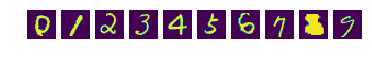

In [20]:
#import sklearn
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
x_test = np.load('test_data.npy')
y_test = np.load('test_labels.npy')
x_train = np.load('train_data.npy')
y_train = np.load('train_labels.npy')

fig, axes = plt.subplots(1, 10)

for i in range(10):
    axes[i].imshow(x_train[random.choice(np.where(y_train==i)[0])].reshape(28,28))
    axes[i].set_axis_off()

plt.show()

### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 


**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
We write the classification for the probability of each pixel being 1 or 0. 

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remeber, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attibute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2
Put you answer here...

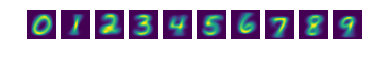

In [21]:
from sklearn.naive_bayes import BernoulliNB 

bnb = BernoulliNB(1,0)
bnb.fit(x_train, y_train)

plt.subplots(1,10)

for i in range(10):
    pxls = sum(x_train[np.where(y_train == i)]) / len(x_train[np.where(y_train == 5)])
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(pxls.reshape(28,28))

plt.show()

In [6]:
# Predict the test set, and run some metrics:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd

y_pred = bnb.predict(x_test)

confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = [list(range(10))], columns = [list(range(10))])

print('confusion matrix: \n')
print(confusion_mat)

print('\naccuracy score: ' + str(accuracy_score(y_test, y_pred)))

confusion matrix: 

    0   1   2   3   4   5   6   7   8   9
0  89   0   1   0   0   5   2   0   3   0
1   0  94   1   0   0   2   0   0   3   0
2   0   2  83   2   2   0   5   2   4   0
3   2   3   1  83   1   3   0   1   3   3
4   0   1   0   0  84   0   3   0   2  10
5   0   0   1  11   4  77   1   0   4   2
6   2   2   0   0   1   6  87   0   2   0
7   0   2   3   1   0   0   0  86   1   7
8   1   1   0   7   2   0   0   1  82   6
9   0   2   1   1   9   1   0   1   3  82

accuracy score: 0.847


### Multivariate Logistic Regression
We will now look at a discriminative model for this problem, specifically, the Multivariate Logistic Regression model. Again, we will use a prepared implementation of the model, so you won't need to implement it.

In this part we will keep the pixel values in grayscale, and assume the probability of each image being classified as one of the 10 digit classes, matches some multivariate logistic function.

#### Question 3
Run a Multivariate Logitic Regression classifier on the training data and apply predictions on the test data. Use the [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) implementation, and set the `solver` to be `'lbfgs'`.

1. As we did for the Naive Bayes classifier above, plot the confusion matrix of your classifier, as claculated on the test data, and calculate the total accuracy. Summarize the results in your own words.

2. Show some test images which were missclassified (classified incorrectly). Choose one such sample, and output the probability estimates for all classes (use the `predict_proba` function). Describe the results.

Note that here we cannot "generate" examples from the model, nor plot the "mean image".

#### Answer 3
Put you answer here...

In [22]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
# Predict the test set, and run some metrics:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd

y_pred = lr.predict(x_test)
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = [list(range(10))], columns = [list(range(10))])

print('confusion matrix: \n')
print(confusion_mat)

print('\naccuracy score: ' + str(accuracy_score(y_test, y_pred)))

confusion matrix: 

    0   1   2   3   4   5   6   7   8   9
0  97   0   1   0   0   0   2   0   0   0
1   0  93   1   2   0   0   0   0   4   0
2   0   1  82   4   0   0   4   2   6   1
3   1   0   0  84   0   2   1   0  10   2
4   0   1   0   1  85   1   2   0   4   6
5   1   1   0   7   2  78   2   0   7   2
6   0   0   2   0   0   2  92   0   4   0
7   0   2   2   3   1   1   0  83   1   7
8   1   0   4   6   1   2   1   2  81   2
9   0   1   1   3   1   2   1   3   3  85

accuracy score: 0.86


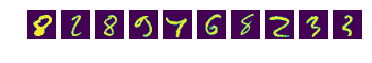

In [29]:
fig, axes = plt.subplots(1, 10)

for i in range(10):
    axes[i].set_axis_off()
    axes[i].imshow(random.choice(x_test[(y_test != y_pred) & (y_pred == i)]).reshape(28,28))